# Dog Motion Pattern Analysis using Sensor Data

In [3]:
import pandas as pd

data_path = "/content/Dog_Data 1_test dataset.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,Unnamed: 0,index,ax,ay,az,gx,gy,gz,tag_no,rtc_timestamp,sys_timestamp
0,0,15,9.17,0.91,4.61,-0.23,-0.07,-0.08,3,2025-10-22 12:51:37,2025-10-21-13-56-56.263
1,1,16,9.66,0.85,4.35,-0.20,-1.44,-0.26,3,2025-10-22 12:51:37,2025-10-21-13-56-56.302
2,2,17,10.00,0.66,2.18,-0.05,-3.35,-0.36,3,2025-10-22 12:51:37,2025-10-21-13-56-56.340
3,3,18,9.80,0.45,1.44,0.18,-1.35,-0.28,3,2025-10-22 12:51:37,2025-10-21-13-56-56.377
4,4,19,9.05,1.02,1.50,-0.05,0.71,0.10,3,2025-10-22 12:51:37,2025-10-21-13-56-56.415


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573296 entries, 0 to 573295
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     573296 non-null  int64  
 1   index          573296 non-null  int64  
 2   ax             573296 non-null  float64
 3   ay             573296 non-null  float64
 4   az             573296 non-null  float64
 5   gx             573296 non-null  float64
 6   gy             573296 non-null  float64
 7   gz             573296 non-null  float64
 8   tag_no         573296 non-null  int64  
 9   rtc_timestamp  573296 non-null  object 
 10  sys_timestamp  573296 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 48.1+ MB


In [22]:
df = df.drop(columns=["index", "tag_no"], errors="ignore")


In [7]:
df.head()

,Unnamed: 0,ax,ay,az,gx,gy,gz,rtc_timestamp,sys_timestamp
0,0,9.17,0.91,4.61,-0.23,-0.07,-0.08,2025-10-22 12:51:37,2025-10-21-13-56-56.263
1,1,9.66,0.85,4.35,-0.20,-1.44,-0.26,2025-10-22 12:51:37,2025-10-21-13-56-56.302
2,2,10.00,0.66,2.18,-0.05,-3.35,-0.36,2025-10-22 12:51:37,2025-10-21-13-56-56.340
3,3,9.80,0.45,1.44,0.18,-1.35,-0.28,2025-10-22 12:51:37,2025-10-21-13-56-56.377
4,4,9.05,1.02,1.50,-0.05,0.71,0.10,2025-10-22 12:51:37,2025-10-21-13-56-56.415


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
ax,0
ay,0
az,0
gx,0
gy,0
gz,0
rtc_timestamp,0
sys_timestamp,0


## no missing values(but im adding forward fill and backward fill)

In [8]:
df=df.fillna(method='ffill').fillna(method='bfill')

/tmp/ipython-input-1638694757.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').fillna(method='bfill')


In [9]:
import numpy as np

df["SMA"] = df[["ax", "ay", "az"]].abs().sum(axis=1)
df[["ax", "ay", "az", "SMA"]].head()

,ax,ay,az,SMA
0,9.17,0.91,4.61,14.69
1,9.66,0.85,4.35,14.86
2,10.00,0.66,2.18,12.84
3,9.80,0.45,1.44,11.69
4,9.05,1.02,1.50,11.57


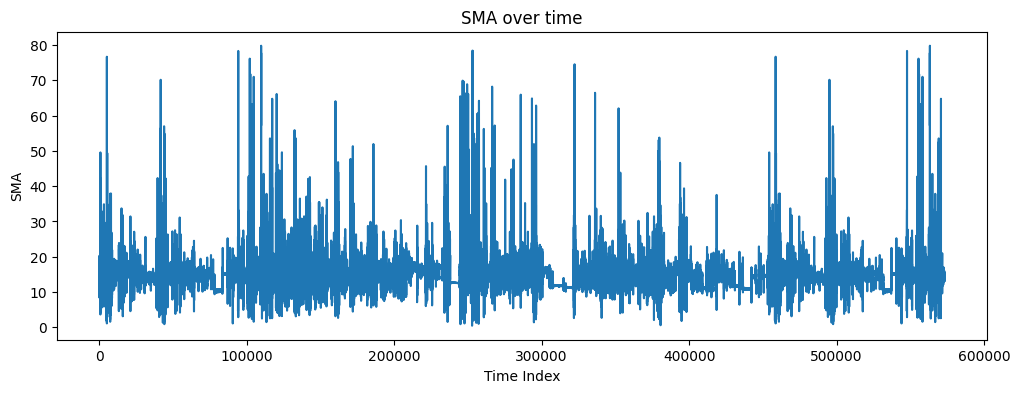

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df["SMA"])
plt.title("SMA over time")
plt.xlabel("Time Index")
plt.ylabel("SMA")
plt.show()


## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler

features = ["ax", "ay", "az", "gx", "gy", "gz", "SMA"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## importing kmeans

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=20)
df["kmeans_cluster"] = kmeans.fit_predict(X_scaled)


In [24]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

X_sample, cluster_sample = resample(
    X_scaled, df["kmeans_cluster"], n_samples=3000, random_state=20
)

silhouette_score(X_sample, cluster_sample)


np.float64(0.19478791837406914)

In [16]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

X_sample, cluster_sample = resample(
    X_scaled, df["kmeans_cluster"], n_samples=5000, random_state=42
)

silhouette_score(X_sample, cluster_sample)


np.float64(0.1893493438983895)

##PCA visualization

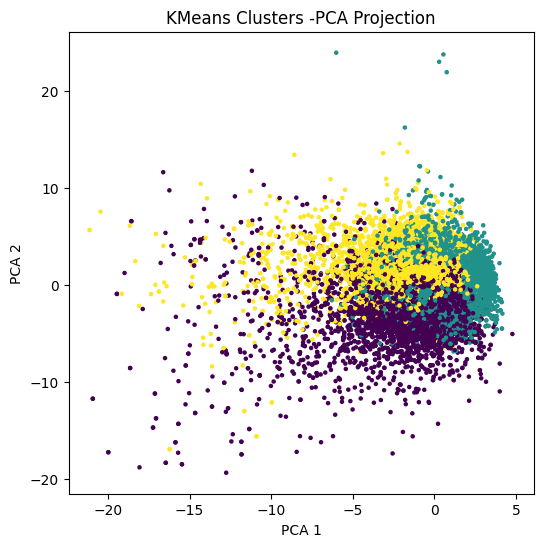

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["kmeans_cluster"], s=5)
plt.title("KMeans Clusters -PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [28]:
df.groupby("kmeans_cluster")["SMA"].describe()


,count,mean,std,min,25%,50%,75%,max
kmeans_cluster,,,,,,,,
0,120209.0,16.164776,3.071126,1.55,14.98,15.88,16.71,79.80
1,314938.0,14.222358,2.179469,0.44,12.57,14.53,15.80,36.76
2,138149.0,14.913153,2.468821,3.62,13.73,14.72,15.93,74.54


##importing DBSCAN

In [31]:
from sklearn.cluster import DBSCAN

X_small = X_scaled[:5000]

dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X_small)

pd.Series(labels).value_counts()


,count
-1,2772
4,1615
1,333
7,115
3,78
6,47
5,18
0,12
2,10
